**MOCHAMAD RAFFLI ISPRIYANTO** PYTN-KS10-022

In [34]:
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import string
import seaborn as sns
import datetime
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest

In [35]:
mpl.style.use(['ggplot'])

In [36]:
df = pd.read_csv('NYC.zip', skipinitialspace=True)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [37]:
df.shape

(84548, 22)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [39]:
df.isnull().sum().sort_values(ascending=False)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
Unnamed: 0                            0
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

In [40]:
df.drop(['Unnamed: 0','EASE-MENT'], axis=1, inplace=True)
df.drop(labels=['ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [41]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
categorical = ['NEIGHBORHOOD', 
               'BUILDING CLASS CATEGORY', 
               'TAX CLASS AT PRESENT', 
               'BUILDING CLASS AT PRESENT',
               'BUILDING CLASS AT TIME OF SALE', 
               'TAX CLASS AT TIME OF SALE']
for kolom in categorical:
    df[kolom] = df[kolom].astype('category')

In [42]:
df[kolom]

0        2
1        2
2        2
3        2
4        2
        ..
84543    1
84544    1
84545    1
84546    4
84547    4
Name: TAX CLASS AT TIME OF SALE, Length: 84548, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [44]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [45]:
sum(df.duplicated())

959

In [46]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated())

0

In [47]:
missing_value = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing_value[missing_value>0], 
                    pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
                   index=['Persentase missing', 'Jumlah missing']
                   )
      )

                    TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT  \
Persentase missing              0.882891                   0.882891   
Jumlah missing                       NaN                        NaN   

                    LAND SQUARE FEET  GROSS SQUARE FEET    SALE PRICE  
Persentase missing          31.04954          32.638266     16.837144  
Jumlah missing           25954.00000       27282.000000  14074.000000  


In [48]:
df['SALE PRICE'].describe()

count    6.951500e+04
mean     1.282005e+06
std      1.143784e+07
min      0.000000e+00
25%      2.300000e+05
50%      5.345810e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [49]:
df = df[df['SALE PRICE'].notnull()]
df = df[df['LAND SQUARE FEET'].notnull()]
df = df[df['GROSS SQUARE FEET'].notnull()]

In [50]:
df = df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

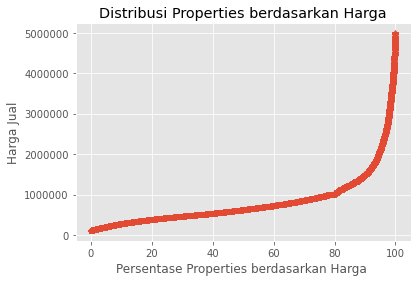

In [51]:
plt.figure(figsize=(6,4))
plt.plot(x['PROPERTY PROPORTION'], 
         x['SALE PRICE'], 
         linestyle=None, 
         marker='*')

plt.title('Distribusi Properties berdasarkan Harga')
plt.xlabel('Persentase Properties berdasarkan Harga ')
plt.ylabel('Harga Jual')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

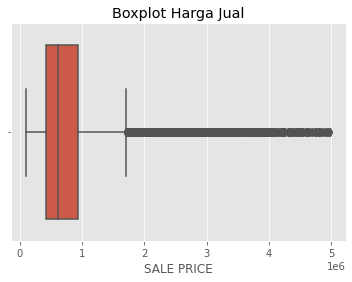

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x='SALE PRICE', data=df)
plt.title('Boxplot Harga Jual')
plt.show()

**Measure of Central Tendency: Mean**

In [53]:
mean = df['SALE PRICE'].mean()
print(mean)

795972.4573388677


**Measure of Central Tendency: Median**

In [54]:
median = df['SALE PRICE'].median()
print(median)

615000.0


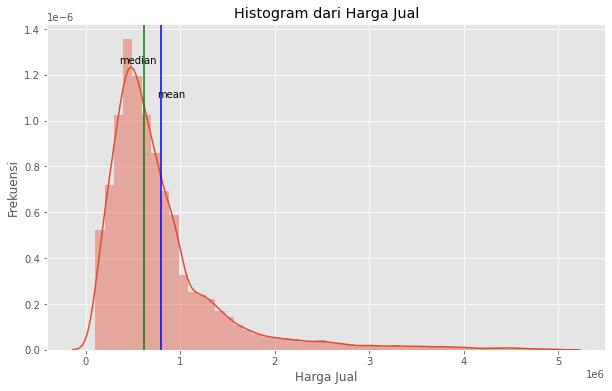

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(df['SALE PRICE'])
plt.title('Histogram dari Harga Jual')
plt.xlabel('Harga Jual')
plt.ylabel('Frekuensi')
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), 
            color='blue')
plt.text(350000,
         0.00000125, 
         'median')
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), 
            color='green')
plt.text(750000,
         0.0000011, 
         'mean')
plt.show()

**Measure of Central Tendency: Modus**

Tahun berapakah yang paling banyak melakukan pembangunan gedung di NYC?

In [56]:
year_built = df['YEAR BUILT'].value_counts()
year_built

1920    3348
1930    2707
1925    2540
1910    1712
1950    1630
        ... 
1854       1
1832       1
1896       1
1847       1
2017       1
Name: YEAR BUILT, Length: 144, dtype: int64

Pada dataset ini tahun yang paling banyak melakukan pembangunan di NYC adalah tahun 1920 dengan 3348

**Measure of Spread: Range**

In [57]:
year_min = year_built.min()
year_max = year_built.max()

year_range = year_max - year_min
print(year_max, '-' , year_min, '=' , year_range)

3348 - 1 = 3347


Range pembangunan gedung terbanyak dan tersedikit adalah 3347

**Measure of Spread: Variance**

In [58]:
varian_harga = df['SALE PRICE'].var()
varian_harga

426769738804.34357

**Measure of Spread: Standard Deviation**

In [59]:
standar = df['SALE PRICE'].std()
print(standar)

653276.1581477956


**Probability Distribution**

<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

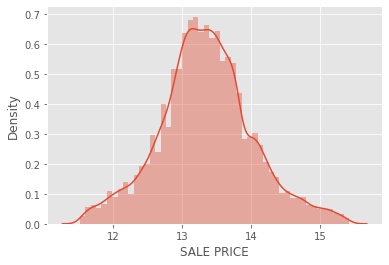

In [60]:
df['SALE PRICE'] = np.log(df['SALE PRICE'])
sns.distplot(df['SALE PRICE'])

Data tidak terdapat skewness yang memiliki arti bahwa sebaran data sudah normal

**Confidence Intervals**

In [61]:
n = 34692
probability_office = 128/n

In [62]:
sm.stats.proportion_confint(n * probability_office, n)

(0.0030516108666624815, 0.004327612008928433)

Jadi Convidence Intervalnya adalah 0.0030516108666624815 dan 0.004327612008928433

**Hypothesis Testing**

In [63]:
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'] = df['BOROUGH'].str.replace('1', 'Manhattan')
df['BOROUGH'] = df['BOROUGH'].str.replace('2', 'Bronx')
df['BOROUGH'] = df['BOROUGH'].str.replace('3', 'Brooklyn')
df['BOROUGH'] = df['BOROUGH'].str.replace('4', 'Queens')
df['BOROUGH'] = df['BOROUGH'].str.replace('5', 'Staten Island')

In [64]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,15.185745,2016-09-23
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,14.976421,2016-09-23
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,3,1,4,1520.0,3360.0,1910,2,S3,15.009433,2016-11-15
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,5,1,6,1779.0,3713.0,1910,2,S5,15.373655,2017-04-03
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,0,1,1,1218.0,3586.0,1899,4,K4,15.123843,2016-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2,3325.0,1300.0,1995,1,B2,13.140203,2016-10-31
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,13.381646,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,13.017003,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,13.217674,2017-04-21


In [65]:
df_grup = df.groupby('BOROUGH', axis=0).sum()
df_grup

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,
Bronx,19585559,1370003,8550,398,8947,10882624.0,9701223.0,8216376,58809.674241
Brooklyn,61616042,5466898,22069,1182,23341,22044154.0,21859405.0,25773358,196625.898233
Manhattan,506732,17482,2384,242,2625,861416.0,4033676.0,589305,4456.865101
Queens,84318984,568145,20304,3141,23437,39427791.0,25687267.0,20311476,139840.960343
Staten Island,16335608,397679,6442,464,6900,24941536.0,10624523.0,9509788,63271.693318


In [66]:
Manhattan = df[df['BOROUGH']=='Manhattan']
Brooklyn = df[df['BOROUGH']=='Brooklyn']

total_unit_Manhattan = df_grup.iloc[-3, 4]
mu_Manhattan = Manhattan['SALE PRICE'].mean()
std_Manhattan = Manhattan['SALE PRICE'].std()
print(total_unit_Manhattan, mu_Manhattan, std_Manhattan)

total_unit_Brooklyn = df_grup.iloc[-4, 4]
mu_Brooklyn = Brooklyn['SALE PRICE'].mean()
std_Brooklyn = Brooklyn['SALE PRICE'].std()
print(total_unit_Brooklyn, mu_Brooklyn, std_Brooklyn)

2625 14.470341238136486 0.743477551576598
23341 13.548260058807184 0.7236732882735784


In [67]:
ztest, pval = ztest(Brooklyn['SALE PRICE'],Manhattan['SALE PRICE'])
print('pval : ', float(pval))

if pval > 0.05:
    print('Hipotesis diterima')
else:
    print('Hipotesis ditolak')

pval :  2.253238313681692e-108
Hipotesis ditolak


Kesimpulannya terdapat perbedaan yang signifikan pada harga rata-rata per unit antara wilayah Brooklyn dengan Manhattan.